# Logistic Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline 

/Users/jacobkoehler/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/jacobkoehler/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
print(sm.datasets.fair.SOURCE)


Fair, Ray. 1978. "A Theory of Extramarital Affairs," `Journal of Political
Economy`, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm



In [3]:
print(sm.datasets.fair.NOTE)

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
          

In [7]:
df = sm.datasets.fair.load_pandas().data

In [9]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [10]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [13]:
df['affair']  = np.where(df['affairs'] > 0, 1, 0)

In [14]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


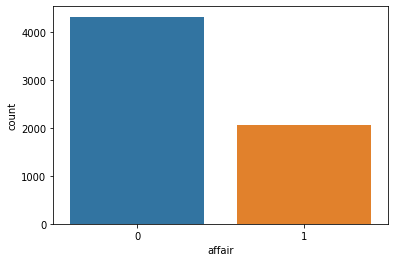

In [65]:
import seaborn as sns
sns.countplot(df['affair'])

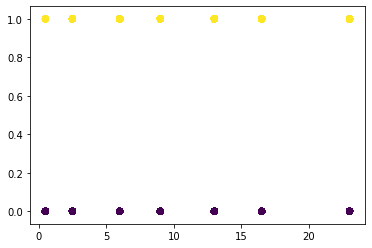

In [66]:
plt.scatter(df['yrs_married'], df['affair'], c = df['affair'])

### Logistic from scratch

$$f(x) = \frac{1}{1 + e^{-x}}$$

In [46]:
def logistic(x, w):
    z = np.dot(x, w)
    return 1/(1 + np.e**(-z))

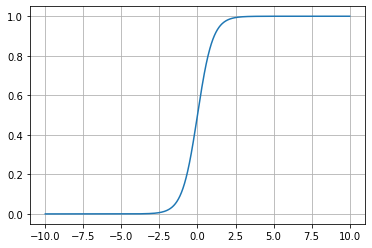

In [48]:
x = np.linspace(-10, 10, 1000)
plt.plot(x, logistic(x, 2))
plt.grid()

### PDF

Likelihood function:

$$L = \prod_{i = 1}^m f(x_i \beta)^{y_i}(1 - f(x_i \beta))^{1 - y_i}$$

Log-Likelihood:

$$ \log L(\beta | x_i, y_i ) = y_i \log f(x_i \beta) + (1 - y_i) \log(1 - f(x_i\beta)) $$

Cost Function:

$$J(\theta) = \frac{-1}{m}\sum_{i = 1}^m [y_i\log(h_{\theta}(x_i)) + (1 - y_i)\log(1 - h_{\alpha}(x_i))]$$

In [36]:
def log_likelihood(x, y, weights):
    z = x@weights
    return np.sum(y*z - np.log(1 + np.exp(z)))

In [58]:
X = df[['rate_marriage', 'yrs_married']]
y = df.affair
theta = np.zeros(X.shape[1])
def grad_desc(X, h, y):
    return (X.T@(h-y))/y.shape[0]
def update_desc(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

In [60]:
h = logistic(X, theta)
gradient = grad_desc(X, h, y)
theta = update_desc(theta, 0.1, gradient)

In [62]:
logistic(X, theta)

array([0.25334196, 0.1909098 , 0.35928798, ..., 0.33932286, 0.27206908,
       0.35928798])

In [63]:
np.where(logistic(X, theta) > 0.5, 1, 0)

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
one_step = logistic(X, theta)
preds = np.where(logistic(X, theta) > 0.5, 1, 0)

In [67]:
np.sum(preds)

0

In [70]:
for i in range(1000):
    h = logistic(X, theta)
    gradient = grad_desc(X, h, y)
    theta = update_desc(theta, 0.1, gradient)

In [71]:
preds = np.where(logistic(X, theta) > 0.5, 1, 0)
np.sum(preds)

0

In [75]:
from statsmodels.formula.api import logit

In [76]:
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'affair'],
      dtype='object')

In [77]:
model = logit('affair ~ rate_marriage + yrs_married + children + educ + occupation', df).fit()

Optimization terminated successfully.
         Current function value: 0.557831
         Iterations 5


In [78]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                 affair   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6360
Method:                           MLE   Df Model:                            5
Date:                Tue, 28 Jan 2020   Pseudo R-squ.:                  0.1128
Time:                        20:36:17   Log-Likelihood:                -3551.2
converged:                       True   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                6.748e-193
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.1078      0.234      9.005      0.000       1.649       2.567
rate_marriage    -0.7260      0.031    -23.407      0.000      -0.787      -0.665
yrs_married       0.0535      0.006     

In [79]:
model.pred_table()

array([[3917.,  396.],
       [1411.,  642.]])

$$(1 - \sigma_i(y_i \dot w))y_ix_i$$

In [80]:
def sigmoid(x, y, w):
    exponent = y*(x.T@w)
    if exponent > 709:
        return 1
    else:
        return np.e**exponent/(1 + np.e**exponent)
    
def to_sum(x, y, w):
    return (1 - sigmoid(x, y, w))*y*w

In [82]:
df.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [83]:
X = df.drop(['affairs', 'affair'], axis = 1)

In [84]:
y = df['affair']

In [85]:
lgr = LogisticRegression()

In [86]:
lgr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
pipe = Pipeline([('sscaler', StandardScaler()), ('lgr', LogisticRegression(solver = 'lbfgs'))])

In [90]:
pipe.fit(X, y)

Pipeline(memory=None,
         steps=[('sscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lgr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [91]:
pipe.score(X, y)

0.7240025133521835

In [92]:
from sklearn.metrics import confusion_matrix, classification_report

In [93]:
preds = pipe.predict(X)
confusion_matrix(y, preds)

array([[3883,  430],
       [1327,  726]])

In [94]:
print(classification_report(y, preds))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82      4313
           1       0.63      0.35      0.45      2053

    accuracy                           0.72      6366
   macro avg       0.69      0.63      0.63      6366
weighted avg       0.71      0.72      0.70      6366



In [95]:
np.unique(y, return_counts=True)

(array([0, 1]), array([4313, 2053]))

In [96]:
4313/(4313 + 2053)

0.6775054979579014

In [102]:
preds_2 = np.where(pipe.predict_proba(X)[:, 0] > 0.35, 0, 1)

In [103]:
print(classification_report(y, preds_2))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82      4313
           1       0.72      0.17      0.27      2053

    accuracy                           0.71      6366
   macro avg       0.71      0.57      0.55      6366
weighted avg       0.71      0.71      0.64      6366



**PRECISION**

$\frac{tp}{tp + fp}$

**RECALL**

$\frac{tp}{tp + fn}$

In [104]:
from sklearn.linear_model import LogisticRegressionCV

In [105]:
lgr_cv = LogisticRegressionCV()
lgr_cv.fit(X, y)

/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [106]:
lgr_cv.C_

array([21.5443469])

In [114]:
coefs = lgr_cv.coef_
for col, coefs in zip(X.columns, coefs[0]):
    print(col, coefs)

rate_marriage -0.7153690958323132
age -0.06022630726801291
yrs_married 0.10978882798508767
children -0.004094276684031035
religious -0.37474636733394867
educ -0.03892680776952516
occupation 0.16027899830028694
occupation_husb 0.01254694153654349


In [119]:
coef_df = pd.DataFrame({'feature': X.columns, 'coef':lgr_cv.coef_[0]})

(array([-0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4]),
 <a list of 7 Text xticklabel objects>)

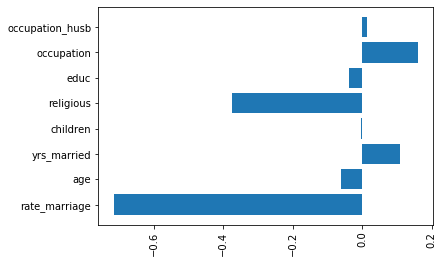

In [123]:
plt.barh(coef_df['feature'], coef_df['coef'])
plt.xticks(rotation = 90)